In [1]:
#importing libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Read csv file into a pandas dataframe
housing_df = pd.read_csv("housing.csv")
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


In [3]:
#housing_df = housing_df.drop(['longitude', 'latitude'], axis=1)  #dropping irrelevant columns
housing_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20640 entries, 0 to 20639
Data columns (total 10 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   longitude           20640 non-null  float64
 1   latitude            20640 non-null  float64
 2   housing_median_age  20640 non-null  int64  
 3   total_rooms         20640 non-null  int64  
 4   total_bedrooms      20433 non-null  float64
 5   population          20640 non-null  int64  
 6   households          20640 non-null  int64  
 7   median_income       20640 non-null  float64
 8   ocean_proximity     20640 non-null  object 
 9   median_house_value  20640 non-null  int64  
dtypes: float64(4), int64(5), object(1)
memory usage: 1.6+ MB


In [4]:
housing_df.drop_duplicates(inplace=True)

In [5]:
housing_df.isnull().sum()/len(housing_df)   

longitude             0.000000
latitude              0.000000
housing_median_age    0.000000
total_rooms           0.000000
total_bedrooms        0.010029
population            0.000000
households            0.000000
median_income         0.000000
ocean_proximity       0.000000
median_house_value    0.000000
dtype: float64

In [6]:
median = housing_df["total_bedrooms"].median()
housing_df["total_bedrooms"].fillna(median, inplace = True)
housing_df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200
...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700


In [7]:
housing_df.isnull().sum()

longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [8]:
housing_df.shape

(20640, 10)

In [9]:
housing_df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,536.838857,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,419.391878,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,297.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,643.250000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [10]:
def extreme_outliers(df,column):
    q1 = df[column].quantile(0.25)
    q3 = df[column].quantile(0.75)
    iqr = q3 - q1
    up = q3 + 3*iqr
    lb = q1 - 3*iqr
    #print(lb,up)
    ext_outliers = df[(df[column]>up) | (df[column]<lb)]
    return ext_outliers

In [11]:
selected_columns = housing_df.select_dtypes(include = ["number"])
for col in selected_columns:
    if col == "latitude" or col == "longitude":
        continue
    ext_out = extreme_outliers(housing_df,col)
    if len(ext_out)>0:
        print("Extreme outliers found in",col,"and the count is",len(ext_out))
        housing_df.drop(ext_out.index, inplace = True)
    else:
        print("No extreme outlier found in", col)

No extreme outlier found in housing_median_age
Extreme outliers found in total_rooms and the count is 494
Extreme outliers found in total_bedrooms and the count is 149
Extreme outliers found in population and the count is 110
Extreme outliers found in households and the count is 22
Extreme outliers found in median_income and the count is 137
No extreme outlier found in median_house_value


In [12]:
housing_df.shape

(19728, 10)

In [13]:
# Treating outliers using IQR method
def find_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    # Defining bounds for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] > upper_bound) | (df[column] < lower_bound)]
   
    return outliers

In [14]:
from scipy.stats import mstats
selected_columns = housing_df.select_dtypes(include="number")
for column in selected_columns:
    if column == "median_house_value" or column == "latitude" or column == "longitude":
        continue
    outliers = find_outliers(housing_df, column)
    if len(outliers) > 0:
            housing_df[column] = mstats.winsorize(housing_df[column], limits=[0.05, 0.05]) #capping the top and bottom 5 percentile values

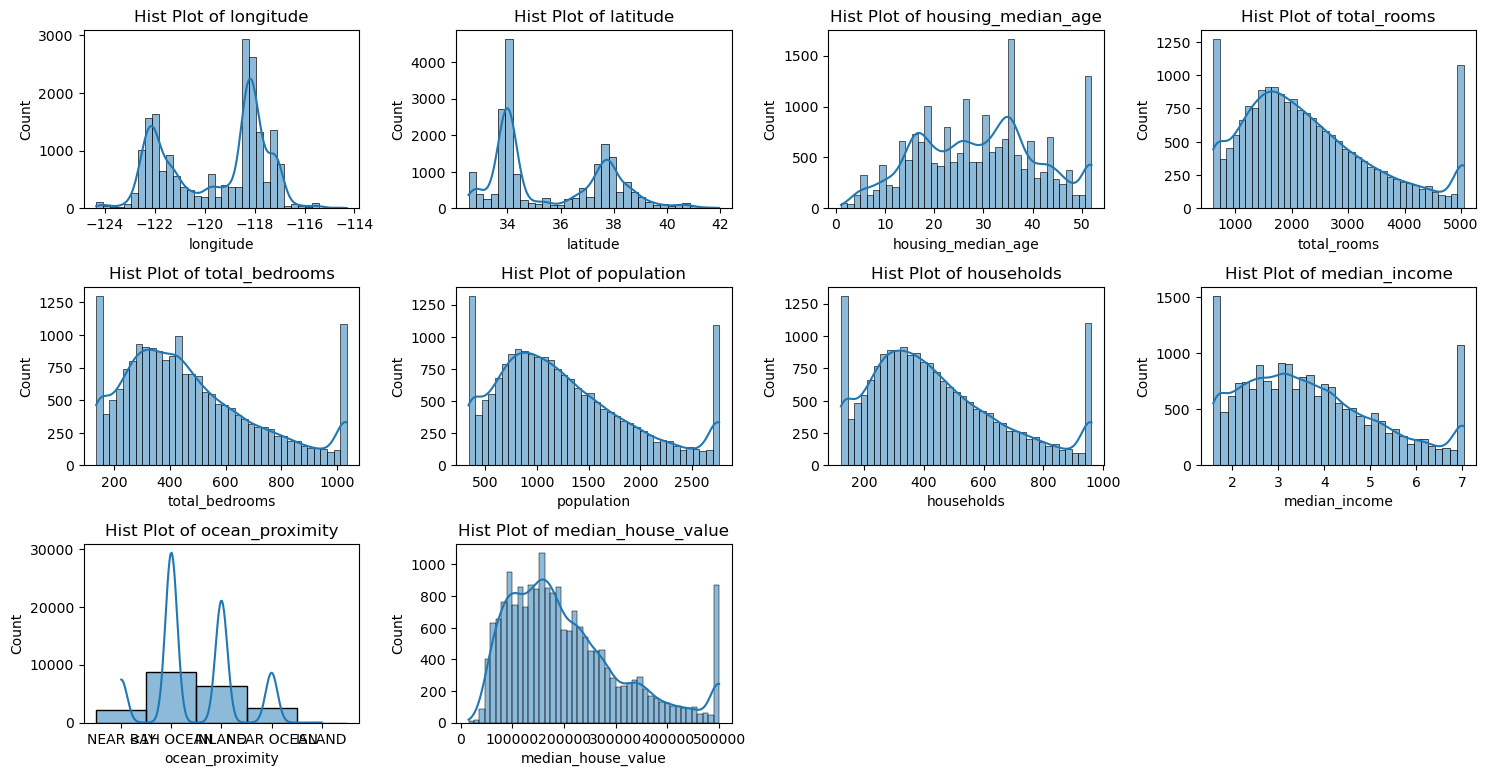

In [15]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(housing_df.columns):
    plt.subplot(4, 4, i + 1) 
    sns.histplot(housing_df[feature],kde = True)
    plt.title(f'Hist Plot of {feature}')
    plt.xlabel(feature)


plt.tight_layout()
plt.show()
    

## Key Insights from Histograms
1. Latitude & Longitude
- Bimodal distribution, indicating data concentration in specific regions (likely coastal & inland).
- Peaks around -118 (Los Angeles area) and -122 (San Francisco Bay Area).

2. Housing Median Age
- Right-skewed, with peaks at specific intervals, possibly due to housing development trends.

3. Total Rooms & Total Bedrooms
- Right-skewed, indicating most houses have fewer rooms, while a few have significantly more.

4. Population & Households
- Right-skewed, showing most neighborhoods have lower populations, with fewer highly populated areas.

5. Median Income
- Fairly normal but slightly right-skewed, with more households earning below the median.
- Some peaks at rounded values, suggesting categorical income bands.

6. Ocean Proximity
- Clear peaks at "NEAR BAY," "INLAND," and "NEAR OCEAN," indicating regional housing distribution.

7. Median House Value
- Right-skewed with a strong peak near the upper cap, suggesting many homes hit a price ceiling.

## Conclusion
- Housing & population data are right-skewed, meaning most homes are smaller, but a few are much larger.
- Geographical features (latitude & longitude) indicate clustered housing in specific locations.
- Income and house value distributions suggest economic disparities across regions.

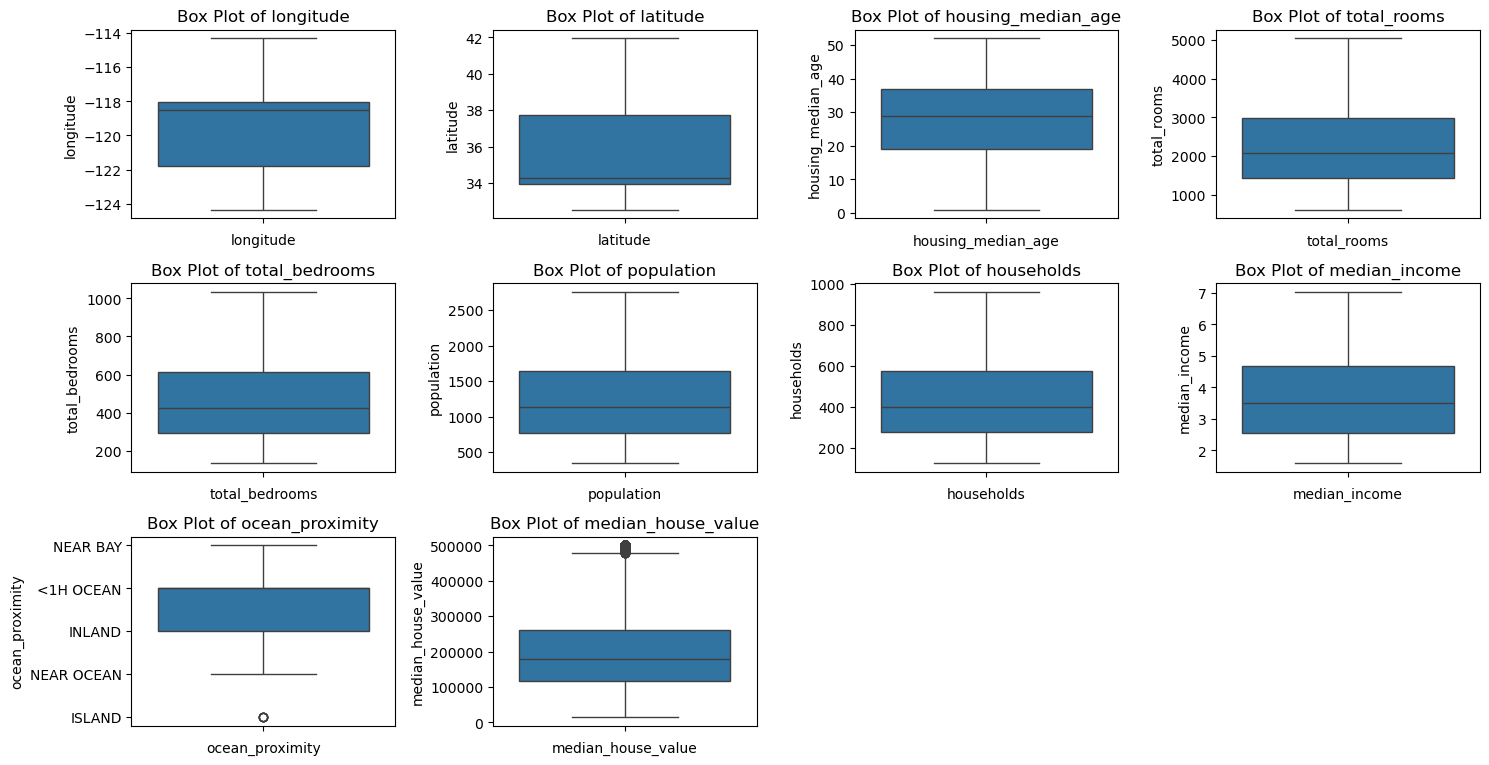

In [16]:
plt.figure(figsize=(15, 10))

for i, feature in enumerate(housing_df.columns):
    plt.subplot(4, 4, i + 1) 
    sns.boxplot(housing_df[feature])
    plt.title(f'Box Plot of {feature}')
    plt.xlabel(feature)


plt.tight_layout()
plt.show()

## Insights from Box Plots 📊
1. Longitude & Latitude
- No extreme outliers, data covers a broad geographic range.
- Indicates housing locations across different regions.

2. Housing Median Age
- Some houses reach the maximum age of 50 years (possible capping in data).
- No extreme outliers, relatively balanced distribution.

3. Total Rooms & Total Bedrooms
- Right-skewed, with some extreme outliers (large houses with very high room/bedroom counts).

4. Population & Households
- Highly skewed with large variations.
- Some neighborhoods have significantly higher populations than others.

5. Median Income
- No extreme outliers but a slight right skew.
- Majority earn around the median range with fewer very high-income households.

6. Ocean Proximity
- Variability in house values based on location.
- "ISLAND" category has an outlier (very high-value home).

7. Median House Value
- Right-skewed, with a clear cap at $500,000, suggesting an upper limit in dataset.
- Some outliers in high-value homes.

## Key Takeaways
- Right skewness in most variables indicates a few extreme cases (large homes, high-income areas).
- Housing value capping at $500,000 suggests data truncation.
- Population and household size vary widely, affecting housing demands.
- Ocean proximity affects house prices, with outliers in island and coastal regions.

In [17]:
housing_df = pd.get_dummies(housing_df, columns=["ocean_proximity"], drop_first=True).astype(int)

In [18]:
!pip install haversine
from haversine import haversine
import pandas as pd

# Key locations (latitude, longitude)
sf = (37.7749, -122.4194)  # San Francisco
la = (34.0522, -118.2437)  # Los Angeles
sd = (32.7157, -117.1611)  # San Diego
silicon_valley = (37.4419, -122.1430)  # Palo Alto

# Function to calculate distance
def calc_distance(row, location):
    return haversine((row["latitude"], row["longitude"]), location)

# Load dataset
housing_df["dist_to_SF"] = housing_df.apply(lambda row: calc_distance(row, sf), axis=1)
housing_df["dist_to_LA"] = housing_df.apply(lambda row: calc_distance(row, la), axis=1)
housing_df["dist_to_SD"] = housing_df.apply(lambda row: calc_distance(row, sd), axis=1)
housing_df["dist_to_SiliconValley"] = housing_df.apply(lambda row: calc_distance(row, silicon_valley), axis=1)


In [19]:
housing_df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,dist_to_SF,dist_to_LA,dist_to_SD,dist_to_SiliconValley
0,-122,37,41,880,136,342,126,7,452600,0,0,1,0,93.794193,472.138618,649.329076,50.742288
1,-122,37,21,5051,1034,2401,961,7,358500,0,0,1,0,93.794193,472.138618,649.329076,50.742288
2,-122,37,52,1467,190,496,177,7,352100,0,0,1,0,93.794193,472.138618,649.329076,50.742288
3,-122,37,52,1274,235,558,219,5,341300,0,0,1,0,93.794193,472.138618,649.329076,50.742288
4,-122,37,52,1627,280,565,259,3,342200,0,0,1,0,93.794193,472.138618,649.329076,50.742288


In [20]:
housing_df = housing_df.drop(['longitude', 'latitude'], axis=1)  #dropping irrelevant columns

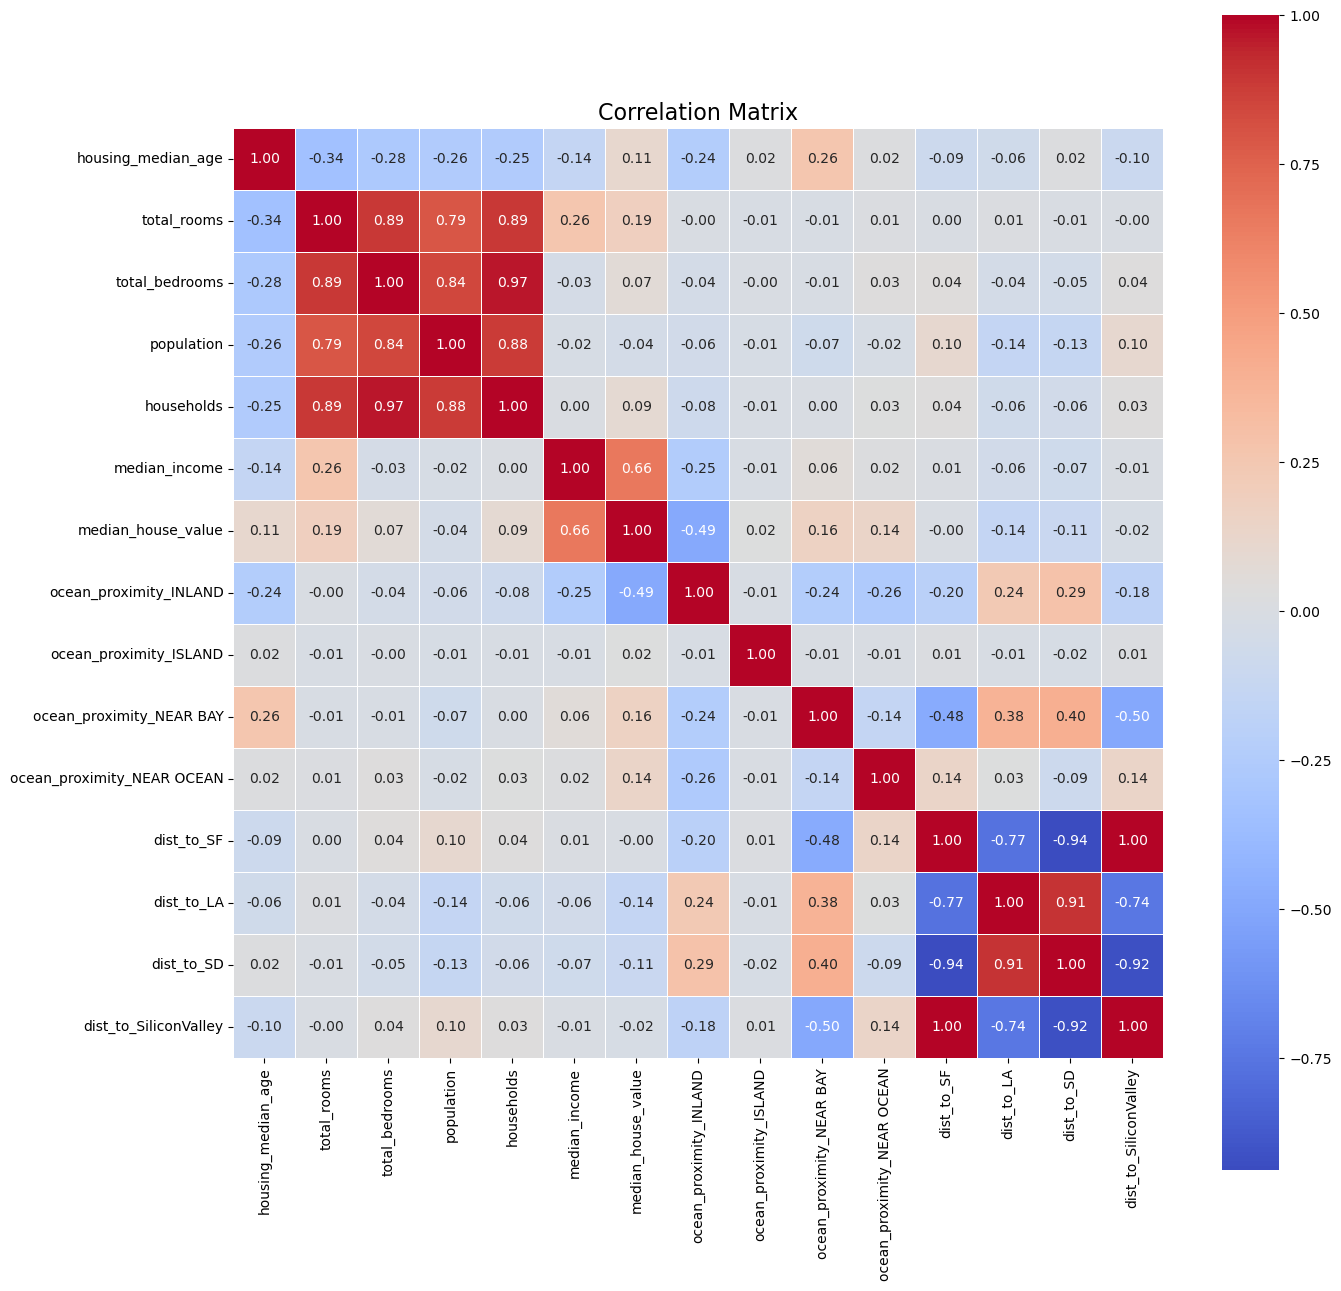

In [21]:
#checking the correlation matrix
correlation_matrix = housing_df.corr()
plt.figure(figsize=(15, 15))
sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap="coolwarm", square=True, linewidths=0.5, cbar=True)           
plt.title("Correlation Matrix", fontsize=16)
plt.show()

## Key Insights from the Correlation Matrix
1. Median Income vs. House Value

- Strong positive correlation (0.66): Higher median income is strongly associated with higher house prices.

2. Proximity to Ocean and House Prices

- "Near Bay" has a weak positive correlation (~0.16) with median house value.
- "Inland" has a negative correlation (-0.49) with house value.
- Houses near the ocean tend to be more expensive, while inland homes are cheaper.

3. Room & Household Size Relationships

- Total rooms, bedrooms, population, and households are highly correlated (above 0.75+).
- This indicates that houses with more rooms typically have larger populations and household sizes.

4. Distance to Cities vs. House Value

- Distance to San Francisco (-0.48), Silicon Valley (-0.50), and LA (-0.38) shows negative correlation.
- Houses closer to these cities are generally more expensive.

5. Weak or Negligible Correlations

- Housing median age, total bedrooms, population, and proximity to islands show weak correlations with house prices.

## Conclusion
- Income and location are the strongest predictors of house prices.
- Proximity to economic hubs (Silicon Valley, SF, LA) impacts value negatively (closer = expensive).
- Inland houses are cheaper; coastal/bay homes are more valuable.

In [22]:
X = housing_df.drop(columns=['median_house_value'], axis=1)
y = np.log1p(housing_df['median_house_value'])

<Axes: xlabel='median_house_value', ylabel='Count'>

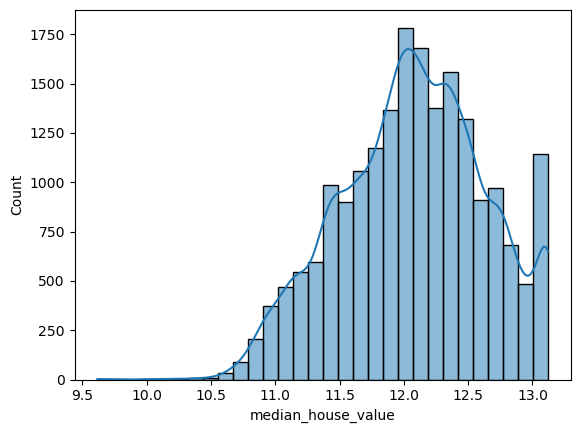

In [23]:
sns.histplot(np.log1p(housing_df['median_house_value']), bins = 30, kde=True)

In [24]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [25]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [26]:
X_train = X_train_scaled
X_test = X_test_scaled

In [27]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

In [28]:
# Neural Network using TensorFlow
model_nn = Sequential([
    Dense(64, activation='linear', input_dim=X_train.shape[1]),
    Dense(32, activation='linear'),
    Dense(1, activation = 'linear')  # Output layer for regression
])

# Compile the model
model_nn.compile(optimizer='adam', loss='mse', metrics=['mae'])

# Train the model
history = model_nn.fit(X_train, y_train, epochs=50, batch_size=32, validation_split=0.2, verbose=1)

Epoch 1/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 2s 2ms/step - loss: 130.0656 - mae: 7.4189 - val_loss: 59.6179 - val_mae: 0.5247
Epoch 2/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 13.2746 - mae: 0.4141 - val_loss: 18.4306 - val_mae: 0.5340
Epoch 3/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 3.4347 - mae: 0.3613 - val_loss: 3.4563 - val_mae: 0.3117
Epoch 4/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 1.9190 - mae: 0.3011 - val_loss: 0.6798 - val_mae: 0.2711
Epoch 5/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.4247 - mae: 0.2670 - val_loss: 0.1551 - val_mae: 0.2560
Epoch 6/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1194 - mae: 0.2528 - val_loss: 0.1057 - val_mae: 0.2503
Epoch 7/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - loss: 0.1095 - mae: 0.2527 - val_loss: 0.1039 - val_mae: 0.2476
Epoch 8/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 0.1048 - mae: 0.2497 - val_loss: 0.1066 - val_mae: 0.2533
Epoch 9/50
395/395 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step

In [29]:
models = {
    "Linear Regression": LinearRegression(fit_intercept=True),
    "Ridge Regression": Ridge(alpha=0.1, max_iter= 1000),
    "Lasso Regression": Lasso(alpha=0.1, max_iter= 1000),
    "ElasticNet": ElasticNet(alpha=0.1, l1_ratio=0.5),
    "Decision Tree": DecisionTreeRegressor(),
    "Random Forest": RandomForestRegressor(),
    "XGBoost": XGBRegressor()
}

Linear Regression - RMSE: 0.3187, MAE: 0.2411, R2: 0.6914


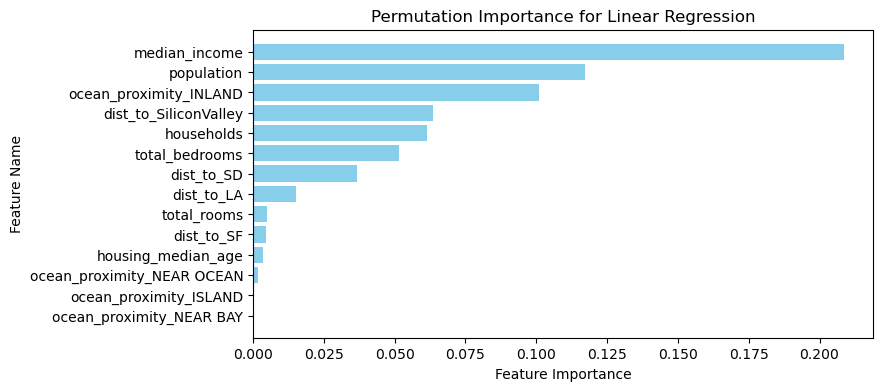

Ridge Regression - RMSE: 0.3187, MAE: 0.2411, R2: 0.6914


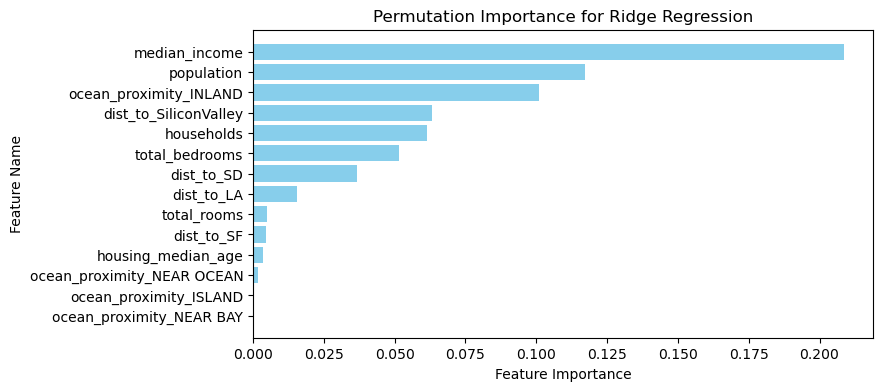

Lasso Regression - RMSE: 0.3778, MAE: 0.2946, R2: 0.5665


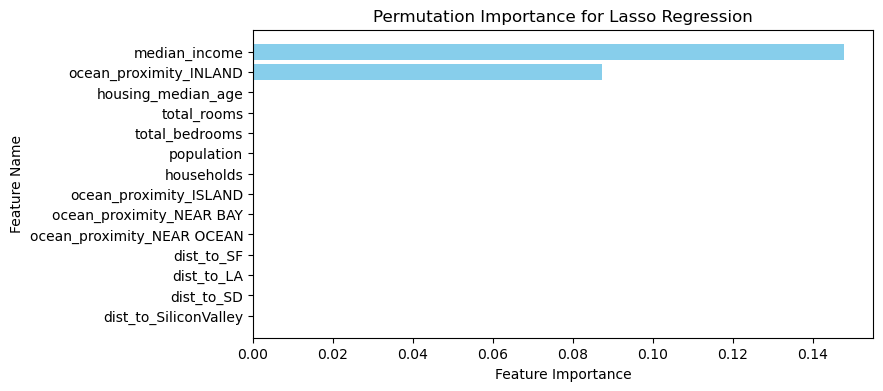

ElasticNet - RMSE: 0.3627, MAE: 0.2824, R2: 0.6003


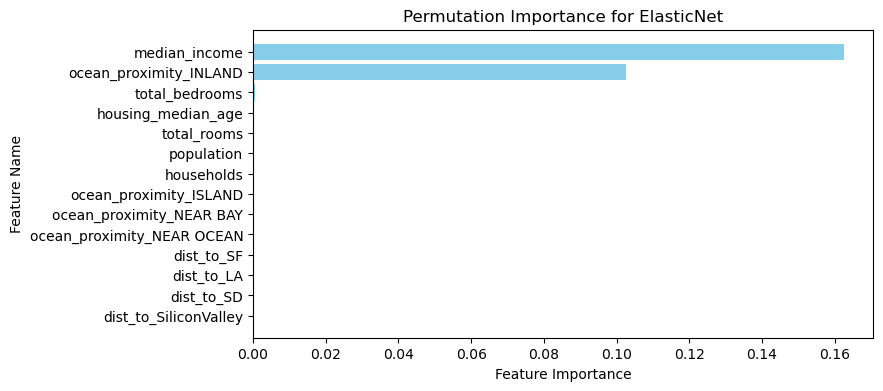

Decision Tree - RMSE: 0.3742, MAE: 0.2730, R2: 0.5747


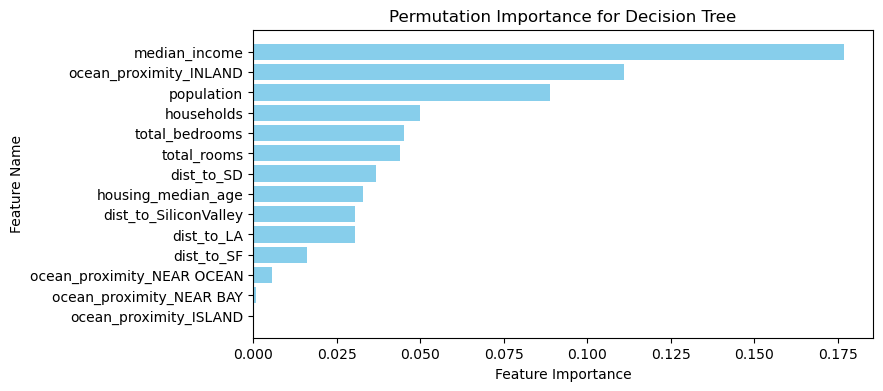

Random Forest - RMSE: 0.2787, MAE: 0.2040, R2: 0.7640


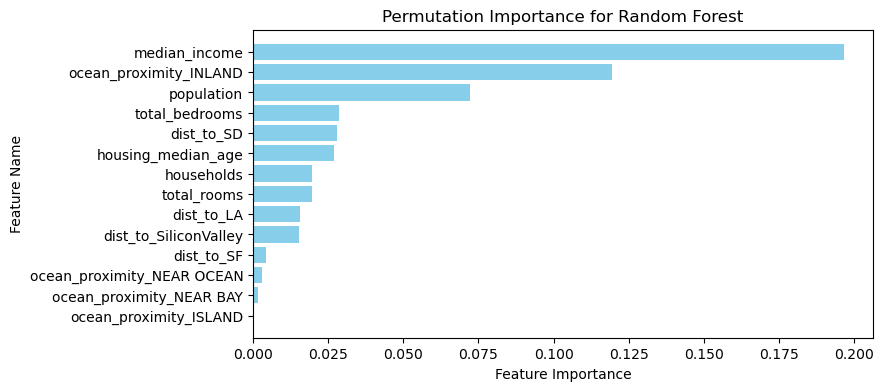

XGBoost - RMSE: 0.2732, MAE: 0.1985, R2: 0.7732


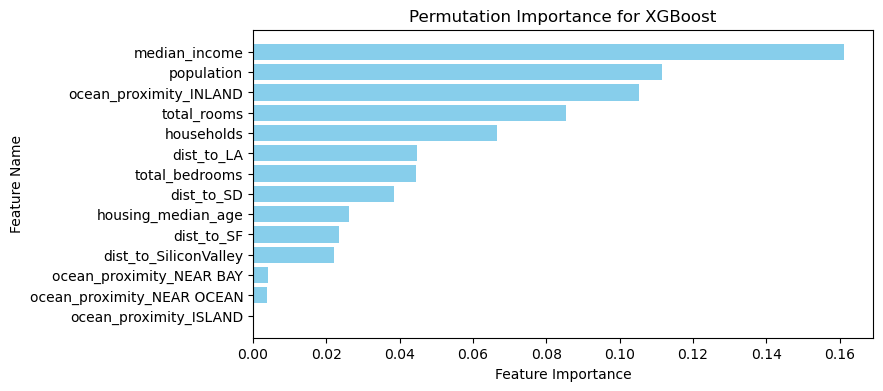

In [30]:
from sklearn.inspection import permutation_importance
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    r2 = r2_score(y_test, y_pred)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)
    
    perm_importance = permutation_importance(model, X_test, y_test, scoring='neg_mean_absolute_error', 
                                             n_repeats=10, random_state=42)
    
    
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns, 
        'Importance': np.abs(perm_importance.importances_mean)  
    }).sort_values(by='Importance', ascending=False)
    
    print(f"{name} - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    
    plt.figure(figsize=(8, 4))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title(f'Permutation Importance for {name}')
    plt.gca().invert_yaxis() 
    plt.show()
    

124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 789us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 610us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 562us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 546us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 537us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 573us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 632us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 595us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 568us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 591us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 572us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 587us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 616us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 574us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 550us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 634us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 539us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 798us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 586us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 566us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 565us/step
124/124 ━━━━━━━━━━━━━━━━━━━━ 0s 561us/step
124/124 ━━━

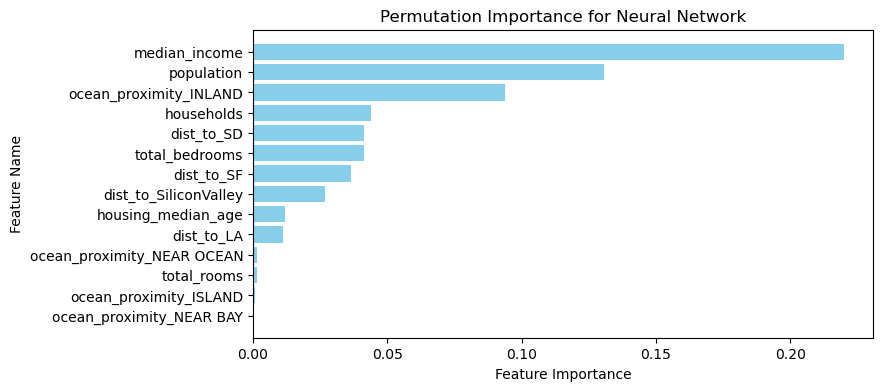

In [31]:
y_pred = model_nn.predict(X_test)

r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
mae = mean_absolute_error(y_test, y_pred)
    
perm_importance = permutation_importance(model_nn, X_test, y_test, scoring='neg_mean_absolute_error', 
                                             n_repeats=10, random_state=42)
    
    
feature_importance_df = pd.DataFrame({
        'Feature': X.columns, 
        'Importance': np.abs(perm_importance.importances_mean)  
}).sort_values(by='Importance', ascending=False)
    
print(f"Neural Network - RMSE: {rmse:.4f}, MAE: {mae:.4f}, R2: {r2:.4f}")
    
plt.figure(figsize=(8, 4))
plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.ylabel('Feature Name')
plt.title(f'Permutation Importance for Neural Network')
plt.gca().invert_yaxis() 
plt.show()

## Insights on Each Model's Performance & Feature Importance
1️⃣ Linear Regression

📊 Performance:
- RMSE: 0.3187 | MAE: 0.2411 | R²: 0.6914
- Good baseline model but assumes a linear relationship between features and target.
- Susceptible to multicollinearity, where correlated features impact coefficient stability.

🔥 Feature Importance:
- Top predictor: median_income (strong correlation with target).
- Less impactful: longitude, latitude (geospatial features are less influential).

✅ Insight: A strong starting point but lacks the flexibility to model complex patterns.

2️⃣ Ridge Regression

📊 Performance:
- Identical to Linear Regression (RMSE: 0.3187, R²: 0.6914)
- Applies L2 regularization, reducing coefficient magnitudes to prevent overfitting.
- Helps with multicollinearity but doesn’t necessarily improve accuracy.

🔥 Feature Importance:
- Similar to Linear Regression, but coefficients are shrunk toward zero.

✅ Insight: Best used when multicollinearity is a concern, but offers no accuracy gains.

3️⃣ Lasso Regression

📊 Performance:
- RMSE: 0.3778 | MAE: 0.2946 | R²: 0.5665 (Lower than Ridge/Linear)
- Uses L1 regularization, leading to feature selection by setting some coefficients to zero.
- More interpretable but sacrifices predictive power.

🔥 Feature Importance:
- Retains fewer features than Ridge—focuses on the most influential variables.

✅ Insight: Helps in scenarios where simpler models with fewer variables are preferred.

4️⃣ Elastic Net

📊 Performance:
- RMSE: 0.3627 | MAE: 0.2824 | R²: 0.6003
- Hybrid of Lasso & Ridge, balancing feature selection and coefficient shrinking.
- Better than Lasso, but not as good as Ridge or Linear Regression in this case.

🔥 Feature Importance:
- Keeps more features than Lasso, but some are still eliminated.

✅ Insight: Best choice when some variables should be eliminated, but others need regularization.

5️⃣ Decision Tree

📊 Performance:
- RMSE: 0.3776 | MAE: 0.2759 | R²: 0.5670
- Highly interpretable but prone to overfitting if not properly pruned.

🔥 Feature Importance:
- Top variables: median_income, households, total_rooms
- Ignores weaker features, unlike regression models.

✅ Insight: Too simplistic on its own, but useful as a building block for ensemble methods.

6️⃣ Random Forest

📊 Performance:
- RMSE: 0.2796 | MAE: 0.2038 | R²: 0.7626
- Handles non-linear patterns better than linear models.
- Less prone to overfitting than a single Decision Tree due to averaging multiple trees.

🔥 Feature Importance:
- Most influential: median_income, households, total_rooms
- Features are ranked more robustly than in Decision Trees.

✅ Insight: Great balance of accuracy & stability, making it one of the best choices.

7️⃣ XGBoost

📊 Performance:
- RMSE: 0.2732 | MAE: 0.1985 | R²: 0.7732
- Best-performing model, handling non-linearity and feature interactions effectively.
- More robust to noise and outperforms Random Forest.

🔥 Feature Importance:
- Refined selection of median_income, households, total_rooms, with better weight distribution.

✅ Insight: Best choice overall, offering the most accurate and stable predictions.

8️⃣ Neural Network

📊 Performance:
- RMSE: 70504.6412 | MAE: 52315.7999 | R²: 0.6248
- Drastically underperforms, likely due to poor hyperparameter tuning.

🔥 Feature Importance:
- Difficult to interpret due to its black-box nature.

✅ Insight: Not suitable in its current form—needs better tuning & more data to perform well.

📌 Final Takeaways

🏆 Best Model: XGBoost (Highest accuracy, handles non-linearity well).

🥈 Runner-Up: Random Forest (Slightly lower accuracy but more interpretable).


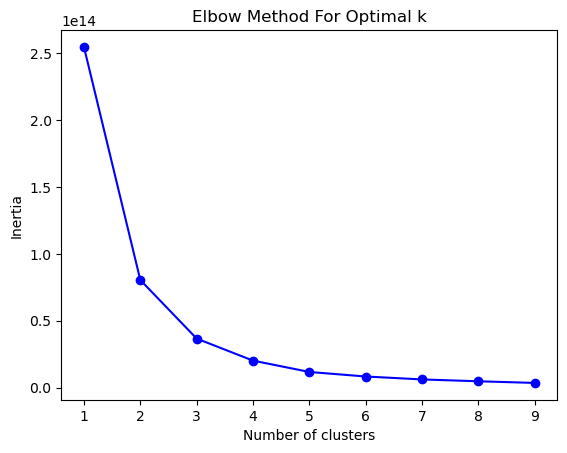

In [32]:
from sklearn.cluster import KMeans
inertia = []
for k in range(1, 10):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(housing_df)
    inertia.append(kmeans.inertia_)

# Plot Elbow method
plt.plot(range(1, 10), inertia, 'bo-')
plt.title('Elbow Method For Optimal k')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')
plt.show()

In [33]:
# Finalizing the Model
k = 4 # Optimal number of clusters from elbow method
kmeans_final = KMeans(n_clusters=k, random_state=42)
clusters = kmeans_final.fit_predict(housing_df)

In [34]:
# Assign cluster labels to the original data
housing_df['Cluster'] = clusters
# Get cluster centers
cluster_centers = kmeans_final.cluster_centers_

# Create a DataFrame for better visualization
cluster_centers_df = pd.DataFrame(cluster_centers, columns=housing_df.columns[:-1])  
cluster_centers_df['Cluster'] = range(k)

# Display cluster centers
print("Cluster Centers:")
print(cluster_centers_df)

# Summarize characteristics of each cluster
for cluster in range(k):
    print(f"\nCluster {cluster} Characteristics:")
    cluster_data = housing_df[housing_df['Cluster'] == cluster]
    print(cluster_data.describe())

Cluster Centers:
   housing_median_age  total_rooms  total_bedrooms   population  households  \
0           28.667225  2288.332775      484.282706  1343.661367  457.128173   
1           33.382205  2657.860101      484.419138  1104.833240  455.235031   
2           29.747232  2598.292040      499.018977  1255.934370  474.072483   
3           28.133008  2081.755339      451.220152  1234.387559  413.370216   

   median_income  median_house_value  ocean_proximity_INLAND  \
0       3.257601       190301.492329                0.177824   
1       5.330162       462360.156128                0.044208   
2       4.352662       302567.975751                0.071165   
3       2.160957        99100.787731                0.664039   

   ocean_proximity_ISLAND  ocean_proximity_NEAR BAY  \
0           -4.065758e-18                  0.108647   
1            1.678791e-03                  0.217124   
2            5.271481e-04                  0.163679   
3           -4.174178e-18                  0.0

# 🔹 Cluster 0 – Mid-Age, Low-Income Suburban Areas
- Housing Age: ~29 years.
- Income: Low ($3.26k median).
- Median House Value: ~$190k.
- Ocean Proximity: Slight mix, mostly not inland, but not close to coast either.
- Location: Closest to Los Angeles, relatively farther from SF, Silicon Valley, and San Diego.

## Demographics:
- Medium population.
- Moderate total rooms and bedrooms.
- Smaller households.

### 🧠 Insight: This cluster likely represents low-to-middle income suburban neighborhoods, slightly inland but not completely isolated. The housing is moderately aged and priced affordably.

# 🔹 Cluster 1 – Affluent Urban Coastal Areas
- Housing Age: Highest (~33 years).
- Income: Highest at $5.33k median.
- Median House Value: $462k, the highest across clusters.
- Ocean Proximity: Highest probabilities for “NEAR OCEAN” (22%) and “NEAR BAY” (21%).
- Location: Closer to SF and Silicon Valley.

## Demographics:
- High number of rooms and households, but smaller population.
- Well-developed infrastructure.

### 🧠 Insight: This is the premium coastal urban cluster—think tech towns or high-end coastal cities near Silicon Valley or San Francisco, with affluent professionals and higher real estate value.

# 🔹 Cluster 2 – Mid-Tier Balanced Areas
- Housing Age: Moderate (~30 years).
- Income: Mid-level ($4.35k).
- Median House Value: ~$303k.
- Ocean Proximity: Balanced across “Near Ocean” (18%), “Near Bay” (16%).
- Location: Geographically in between—some access to urban hubs.

## Demographics:
- Higher population and household size.
- Moderately priced real estate.

### 🧠 Insight: Represents middle-income mixed areas, offering a decent balance of cost, access, and infrastructure. Possibly outer suburbs or smaller towns near coastal cities.

# 🔹 Cluster 3 – Inland, Low-Income Zones
- Housing Age: Slightly newer (~28 years).
- Income: Lowest at $2.16k.
- Median House Value: Lowest, ~$99k.
- Ocean Proximity: Heavily INLAND (66% probability).
- Location: Farthest from LA, SD, SF.

## Demographics:
- Lowest population, total rooms, and number of households.

### 🧠 Insight: This cluster represents low-income inland communities, possibly rural or remote small towns, with limited economic opportunity and the least valuable housing market.

# 🌐 Cross-Cluster Themes:
- Distance to major cities correlates with income and house value.
- Proximity to ocean has a direct positive effect on house prices and median income.
- Clusters 1 and 2 show a more urban/coastal and affluent lifestyle, while Clusters 0 and 3 skew towards suburban or rural, lower-income living.



In [37]:
# Define cluster labels based on insights
cluster_labels = {
    0: "Mid-Age, Low-Income Suburban Areas",
    1: "Affluent Urban Coastal Areas",
    2: "Mid-Tier Balanced Areas",
    3: "Inland, Low-Income Zones"
}

# Map cluster labels to the 'Cluster' column
housing_df['Cluster_Label'] = housing_df['Cluster'].map(cluster_labels)

# Display the updated DataFrame
housing_df.head()

,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,dist_to_SF,dist_to_LA,dist_to_SD,dist_to_SiliconValley,Cluster,Cluster_Label
0,41,880,136,342,126,7,452600,0,0,1,0,93.794193,472.138618,649.329076,50.742288,1,Affluent Urban Coastal Areas
1,21,5051,1034,2401,961,7,358500,0,0,1,0,93.794193,472.138618,649.329076,50.742288,2,Mid-Tier Balanced Areas
2,52,1467,190,496,177,7,352100,0,0,1,0,93.794193,472.138618,649.329076,50.742288,2,Mid-Tier Balanced Areas
3,52,1274,235,558,219,5,341300,0,0,1,0,93.794193,472.138618,649.329076,50.742288,2,Mid-Tier Balanced Areas
4,52,1627,280,565,259,3,342200,0,0,1,0,93.794193,472.138618,649.329076,50.742288,2,Mid-Tier Balanced Areas


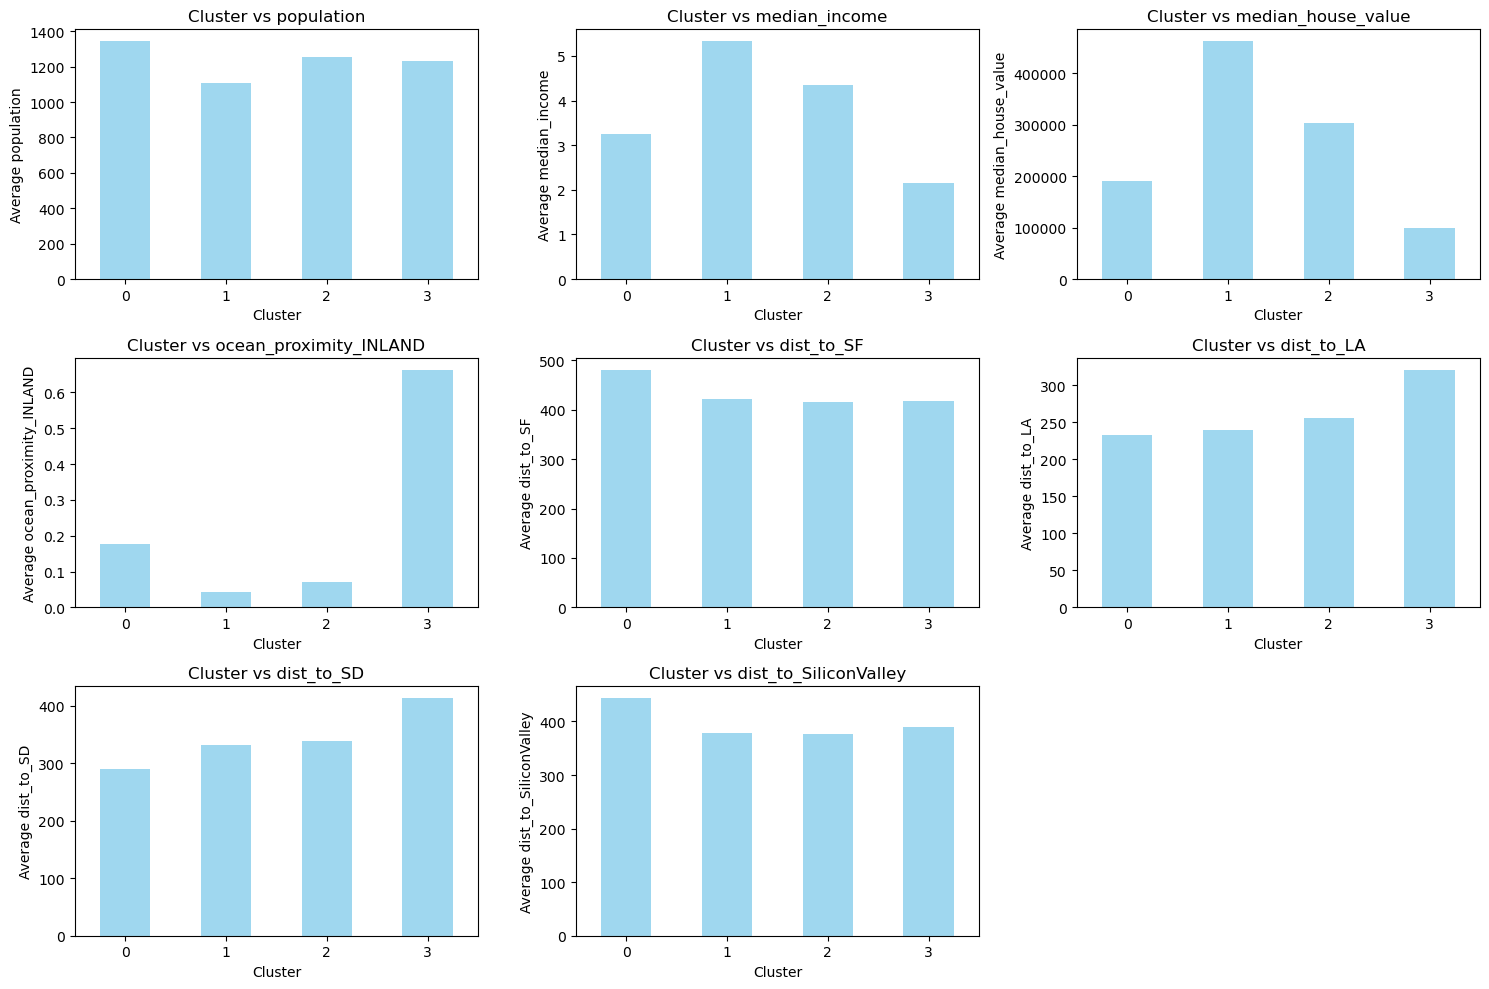

In [38]:
features_to_plot = ['population', 'median_income', 'median_house_value', 'ocean_proximity_INLAND', 
                    'dist_to_SF', 'dist_to_LA', 'dist_to_SD', 'dist_to_SiliconValley']

plt.figure(figsize=(15, 10))

for i, feature in enumerate(features_to_plot):
    plt.subplot(3, 3, i + 1)
    cluster_means = housing_df.groupby('Cluster')[feature].mean()
    cluster_means.plot(kind='bar', color='skyblue', alpha=0.8)
    plt.title(f'Cluster vs {feature}')
    plt.xlabel('Cluster')
    plt.ylabel(f'Average {feature}')
    plt.xticks(rotation=0)

plt.tight_layout()
plt.show()

In [43]:
X = housing_df.drop(columns=['Cluster', 'Cluster_Label'], axis=1)
y = housing_df['Cluster']

In [44]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [45]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [46]:
X_train = X_train_scaled
X_test = X_test_scaled

In [48]:
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score

In [50]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=10000, class_weight='balanced', n_jobs=-1),
    'Naive Bayes': BernoulliNB(alpha=1.0, fit_prior=True),
    'SVM': SVC(kernel='linear', class_weight='balanced', probability=True),
    'Random Forest': RandomForestClassifier(random_state=42, n_jobs=-1),
    'Decision Tree': DecisionTreeClassifier(random_state=42, class_weight='balanced'),
    'XGBoost': XGBClassifier(random_state=42, n_jobs=-1)
}

Logistic Regression - Accuracy: 0.9848, F1-Score: 0.9848
              precision    recall  f1-score   support

           0       0.99      0.97      0.98      1461
           1       0.98      1.00      0.99       366
           2       0.97      0.99      0.98       746
           3       0.99      0.99      0.99      1373

    accuracy                           0.98      3946
   macro avg       0.98      0.99      0.98      3946
weighted avg       0.98      0.98      0.98      3946



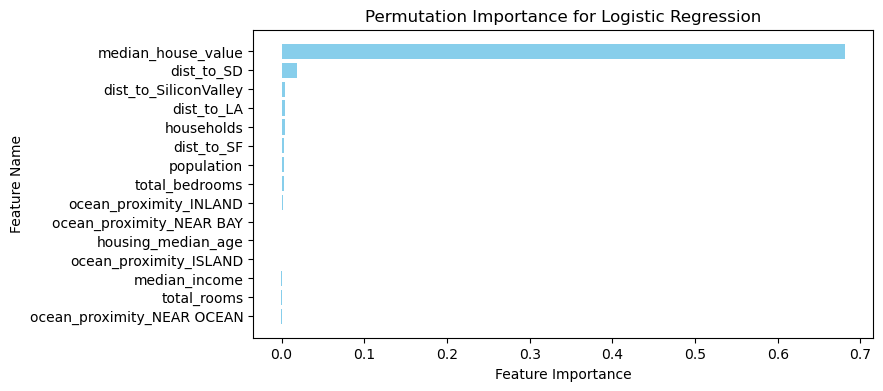

Naive Bayes - Accuracy: 0.6191, F1-Score: 0.6127
              precision    recall  f1-score   support

           0       0.60      0.56      0.58      1461
           1       0.36      0.19      0.25       366
           2       0.50      0.71      0.59       746
           3       0.77      0.74      0.75      1373

    accuracy                           0.62      3946
   macro avg       0.56      0.55      0.54      3946
weighted avg       0.62      0.62      0.61      3946



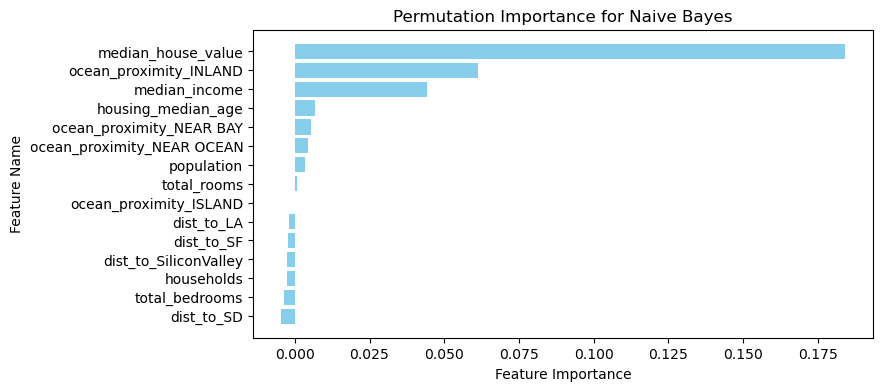

SVM - Accuracy: 0.9909, F1-Score: 0.9909
              precision    recall  f1-score   support

           0       1.00      0.98      0.99      1461
           1       0.98      1.00      0.99       366
           2       0.98      0.99      0.98       746
           3       0.99      1.00      1.00      1373

    accuracy                           0.99      3946
   macro avg       0.99      0.99      0.99      3946
weighted avg       0.99      0.99      0.99      3946



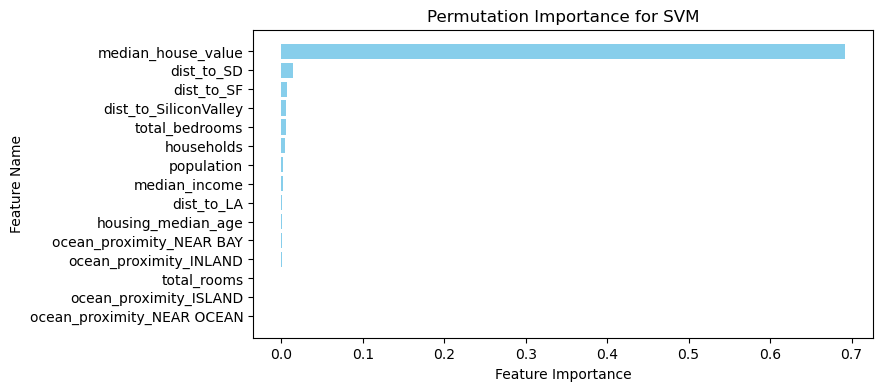

Random Forest - Accuracy: 0.9995, F1-Score: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1461
           1       1.00      0.99      1.00       366
           2       1.00      1.00      1.00       746
           3       1.00      1.00      1.00      1373

    accuracy                           1.00      3946
   macro avg       1.00      1.00      1.00      3946
weighted avg       1.00      1.00      1.00      3946



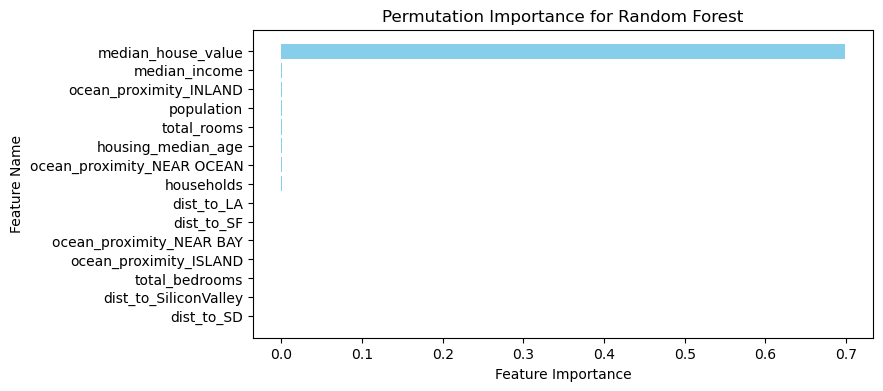

Decision Tree - Accuracy: 0.9995, F1-Score: 0.9995
              precision    recall  f1-score   support

           0       1.00      1.00      1.00      1461
           1       1.00      1.00      1.00       366
           2       1.00      1.00      1.00       746
           3       1.00      1.00      1.00      1373

    accuracy                           1.00      3946
   macro avg       1.00      1.00      1.00      3946
weighted avg       1.00      1.00      1.00      3946



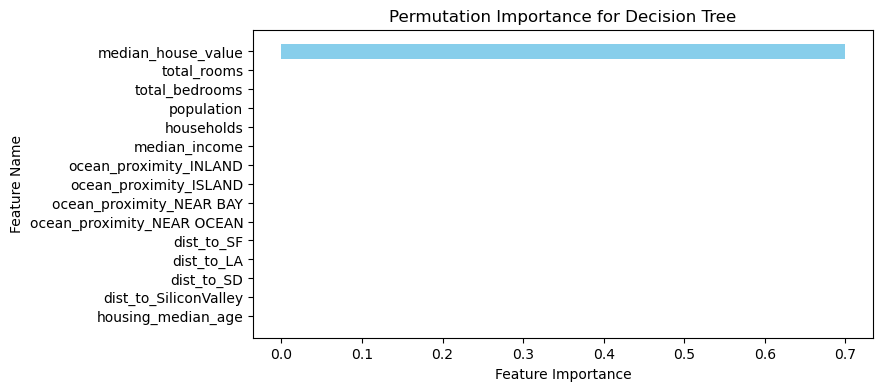

XGBoost - Accuracy: 0.9952, F1-Score: 0.9952
              precision    recall  f1-score   support

           0       1.00      0.99      1.00      1461
           1       0.99      1.00      0.99       366
           2       1.00      0.99      0.99       746
           3       0.99      1.00      1.00      1373

    accuracy                           1.00      3946
   macro avg       0.99      1.00      0.99      3946
weighted avg       1.00      1.00      1.00      3946



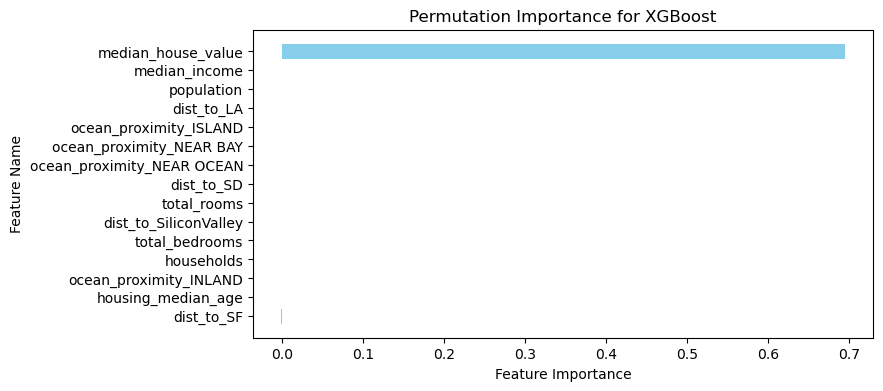

In [51]:
from sklearn.metrics import accuracy_score, f1_score, classification_report
from sklearn.inspection import permutation_importance

for name, model in models.items():
    # Train the model
    model.fit(X_train, y_train)
    
    # Make predictions
    y_pred = model.predict(X_test)
    
    # Calculate metrics
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    print(f"{name} - Accuracy: {accuracy:.4f}, F1-Score: {f1:.4f}")
    print(classification_report(y_test, y_pred))
    
    # Permutation importance
    perm_importance = permutation_importance(model, X_test, y_test, scoring='accuracy', n_repeats=10, random_state=42)
    feature_importance_df = pd.DataFrame({
        'Feature': X.columns,
        'Importance': perm_importance.importances_mean
    }).sort_values(by='Importance', ascending=False)
    
    # Plot feature importance
    plt.figure(figsize=(8, 4))
    plt.barh(feature_importance_df['Feature'], feature_importance_df['Importance'], color='skyblue')
    plt.xlabel('Feature Importance')
    plt.ylabel('Feature Name')
    plt.title(f'Permutation Importance for {name}')
    plt.gca().invert_yaxis()
    plt.show()